In [ ]:
!pip install nest_asyncio


In [ ]:
# Install the Telethon library for Telegram API interactions
!pip install telethon


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.2/702.2 kB 15.6 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=311f8f3233c66fbb7c7e074c456d706d519f435f3353888dc3405f0cb60f9c00
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


In [ ]:
import asyncio
from telethon import TelegramClient
from telethon.errors import SessionPasswordNeededError
import pandas as pd
import nest_asyncio
from google.colab import files

# Apply nest_asyncio patch
nest_asyncio.apply()

# Telegram credentials
username = 'vasanthkarnan_07'  # Your Telegram account username (e.g., 'abc123')
phone = '+918883184138'  # Your Telegram account phone number with country code
api_id = 29484932  # Your API ID (from https://my.telegram.org/apps)
api_hash = '33b795a1dd3613b304c7dd50e3fe1657'  # Your API Hash (from https://my.telegram.org/apps)

# Initialize Telegram client
client = TelegramClient('session_name', api_id, api_hash)

async def list_channels():
    """
    List all channels and groups the user is part of.
    """
    async with client:
        if not await client.is_user_authorized():
            await client.send_code_request(phone)
            await client.sign_in(phone, input('Enter the code sent to your Telegram: '))
            try:
                await client.sign_in(password=input('Enter your 2FA password (if applicable): '))
            except SessionPasswordNeededError:
                print("Two-factor authentication password needed.")
                raise

        print("\nFetching your channels and groups...\n")
        dialogs = await client.get_dialogs()
        for dialog in dialogs:
            if dialog.is_channel:
                print(f"Name: {dialog.name}, ID: {dialog.entity.id}")

async def scrape_messages(channel_identifier):
    """
    Scrape messages from a public or private channel.

    Args:
        channel_identifier: The username (string) or ID (integer) of the channel.
    """
    async with client:
        if not await client.is_user_authorized():
            await client.send_code_request(phone)
            await client.sign_in(phone, input('Enter the code sent to your Telegram: '))
            try:
                await client.sign_in(password=input('Enter your 2FA password (if applicable): '))
            except SessionPasswordNeededError:
                print("Two-factor authentication password needed.")
                raise

        print(f"Scraping messages from channel: {channel_identifier}...\n")
        all_messages = []

        # Fetch messages from the specified channel
        async for message in client.iter_messages(channel_identifier, limit=100):  # Adjust limit as needed
            all_messages.append({
                'message_id': message.id,
                'date': message.date,
                'text': message.text or '',
                'views': message.views if hasattr(message, 'views') else None,
                'forwards': message.forwards if hasattr(message, 'forwards') else None,
                'replies': message.replies.replies if message.replies else None,
                'media': 'Yes' if message.media else 'No'
            })

        # Convert collected messages to a Pandas DataFrame
        df = pd.DataFrame(all_messages)

        # Convert the 'date' column to datetime format
        df['date'] = pd.to_datetime(df['date'])

        # Display basic info about scraped data
        print("\nScraping complete. Here is a summary of the collected data:")
        print(df.info())

        # Save the data to a CSV file and download
        output_file = 'telegram_scraped_data.csv'
        df.to_csv(output_file, encoding='utf-8', index=False)
        files.download(output_file)

        print("\nScraped data successfully saved and downloaded.")

# Main choice loop
while True:
    print("\n1. List all your channels/groups.")
    print("2. Scrape messages from a channel.")
    print("3. Exit.")
    choice = input("Enter your choice (1, 2, or 3): ")

    if choice == '1':
        print("\nListing all your channels and groups...\n")
        asyncio.get_event_loop().run_until_complete(list_channels())
    elif choice == '2':
        channel_identifier = input("Enter the username (without '@') or channel ID: ")
        try:
            # Convert to integer if it's a numeric ID
            channel_identifier = int(channel_identifier)
        except ValueError:
            pass  # Keep as string if it's a username
        asyncio.get_event_loop().run_until_complete(scrape_messages(channel_identifier))
    elif choice == '3':
        print("Exiting the program. Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")



1. List all your channels/groups.
2. Scrape messages from a channel.
3. Exit.
Enter your choice (1, 2, or 3): 1

Listing all your channels and groups...


Fetching your channels and groups...

Name: 𝐌𝐨𝐯𝐢𝐞 𝐑𝐞𝐪𝐮𝐞𝐬𝐭 𝐆𝐫𝐨𝐮𝐩 🎥, ID: 2135122055
Name: MR ~ MovieZ SearcH 🔎, ID: 1898888772
Name: BANKNIFTY NIFTY INTRADAY STOCK OPTIONS, ID: 1615795252
Name: KING MAKER 💝, ID: 1344570816
Name: CB Discussion, ID: 1200566947
Name: Karur_bulls_tamil Calls, ID: 2029661754
Name: MR ~ MovieZ RockerZ, ID: 1707546404
Name: 彡𝙏𝘼𝙈𝙄𝙇 𝙒𝙃𝘼𝙏𝙎 𝘼𝙋𝙋 𝙎𝙏𝘼𝙏 𝙃𝘿 💥彡, ID: 1676139374
Name: Tamil Love Whatsapp Status™, ID: 1282179947
Name: TAMIL LOVE STATUS SONGS VIDEOS, ID: 1492773945
Name: MOMO BGM 7, ID: 1267807595
Name: STOMP BGM OFFICIAL 💌🔥, ID: 1276864838
Name: Tnpsc_Pre_Coaching, ID: 1244472992
Name: ᴅɪsɴᴇʏ ʜᴏᴛsᴛᴀʀ, ID: 1607205622
Name: Javeed crew, ID: 1635401896
Name: OTT Bucket, ID: 1551261840
Name: KARUR BULLS TRADING, ID: 2017787970
Name: Tamil HD Movies 003, ID: 1929842404
Name: 𝘾𝙝𝙚𝙡𝙡𝙖𝙠𝙪𝙩𝙩𝙮 𝘽𝙜𝙢 𝟮.𝟬, ID: 134715636

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Scraped data successfully saved and downloaded.

1. List all your channels/groups.
2. Scrape messages from a channel.
3. Exit.
Enter your choice (1, 2, or 3): 3
Exiting the program. Goodbye!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re


Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   message_id  100 non-null    int64  
 1   date        100 non-null    object 
 2   text        100 non-null    object 
 3   views       100 non-null    int64  
 4   forwards    100 non-null    int64  
 5   replies     0 non-null      float64
 6   media       100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB
None

Cleaning the data...

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   message_id  100 non-null    int64              
 1   date        100 non-null    datetime64[ns, UTC]
 2   text        100 non-null    object             
 3   views       100 non-null  

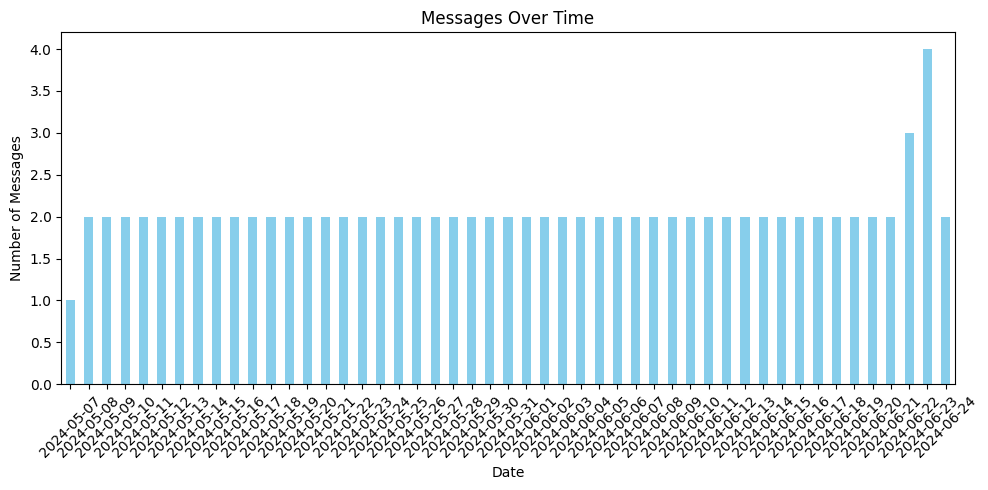

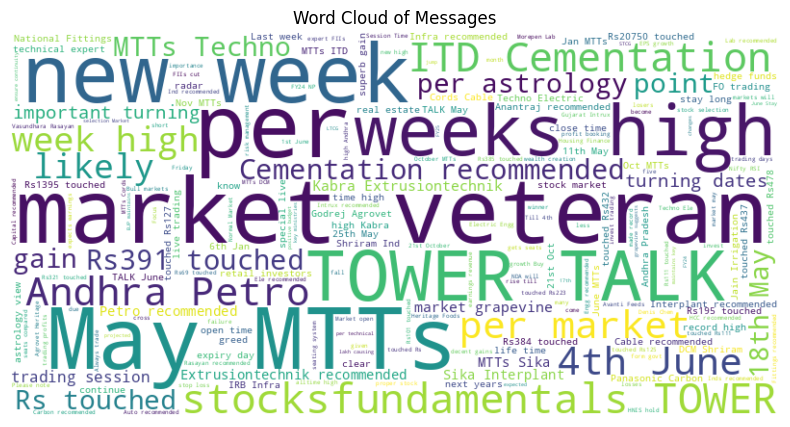

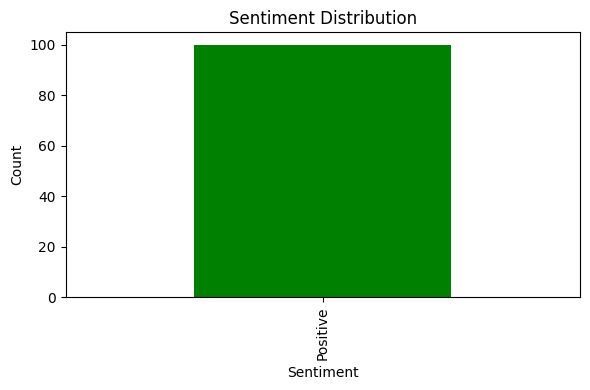

In [5]:

# Load the data
 # Replace with the path to your CSV file
data = pd.read_csv("telegram_scraped_data (1).csv")

# Display basic info about the dataset
print("Original Data Info:")
print(data.info())

# 1. Data Cleaning
print("\nCleaning the data...")

# Drop rows with completely empty 'text'
data.dropna(subset=['text'], inplace=True)

# Remove duplicates
data.drop_duplicates(subset=['message_id'], inplace=True)

# Clean text: remove URLs, special characters, and extra spaces
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

data['text'] = data['text'].apply(clean_text)

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

print("\nCleaned Data Info:")
print(data.info())

# 2. Data Analysis
print("\nAnalyzing the data...")

# Message count
message_count = data.shape[0]
print(f"Total Messages: {message_count}")

# Activity over time
data['day'] = data['date'].dt.date
daily_activity = data.groupby('day').size()

# Word Frequency
all_text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['text'].apply(analyze_sentiment)
sentiment_counts = data['sentiment'].value_counts()

# 3. Visualization
print("\nGenerating visualizations...")

# Plot daily activity
plt.figure(figsize=(10, 5))
daily_activity.plot(kind='bar', color='skyblue')
plt.title("Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Messages")
plt.show()

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


